<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 36s 19ms/step - loss: 0.6459 - accuracy: 0.5684 - val_loss: 0.3462 - val_accuracy: 0.8496
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2663 - accuracy: 0.8936 - val_loss: 0.3345 - val_accuracy: 0.8628
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1391 - accuracy: 0.9546 - val_loss: 0.3173 - val_accuracy: 0.8804
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0521 - accuracy: 0.9869 - val_loss: 0.3816 - val_accuracy: 0.8856
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.5812 - val_accuracy: 0.8572
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.5982 - val_accuracy: 0.8652
Epoch 7/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.55

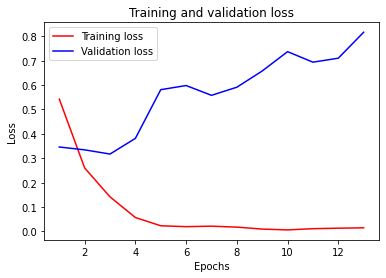

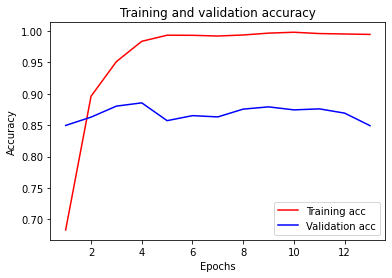

              precision    recall  f1-score   support

           0      0.906     0.846     0.875     12500
           1      0.856     0.913     0.883     12500

    accuracy                          0.879     25000
   macro avg      0.881     0.879     0.879     25000
weighted avg      0.881     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6477 - accuracy: 0.5744 - val_loss: 0.3588 - val_accuracy: 0.8436
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2738 - accuracy: 0.8896 - val_loss: 0.3060 - val_accuracy: 0.8724
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1262 - accuracy: 0.9600 - val_loss: 0.3384 - val_accuracy: 0.8628
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0586 - accuracy: 0.9847 - val_loss: 0.4105 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

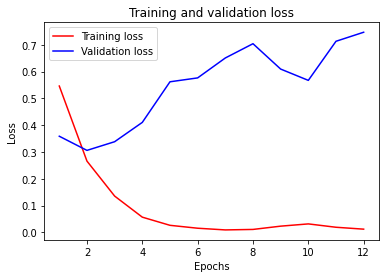

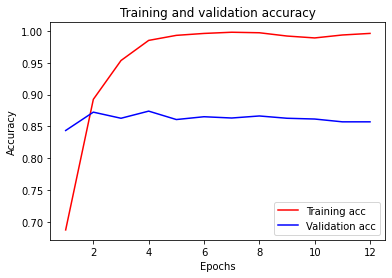

              precision    recall  f1-score   support

           0      0.843     0.906     0.873     12500
           1      0.898     0.832     0.864     12500

    accuracy                          0.869     25000
   macro avg      0.871     0.869     0.869     25000
weighted avg      0.871     0.869     0.869     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6377 - accuracy: 0.5895 - val_loss: 0.3815 - val_accuracy: 0.8276
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2808 - accuracy: 0.8866 - val_loss: 0.2950 - val_accuracy: 0.8808
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1469 - accuracy: 0.9484 - val_loss: 0.3122 - val_accuracy: 0.8788
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0596 - accuracy: 0.9841 - val_loss: 0.3902 - val_accuracy: 0.8756
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

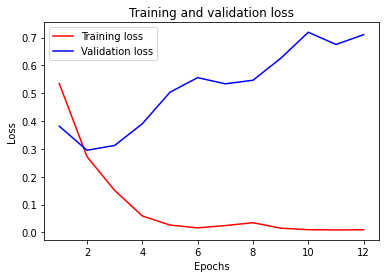

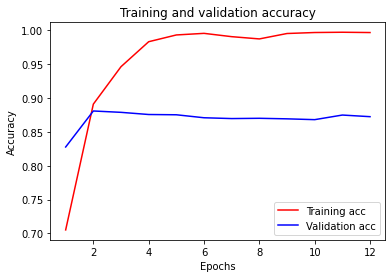

              precision    recall  f1-score   support

           0      0.913     0.821     0.864     12500
           1      0.837     0.921     0.877     12500

    accuracy                          0.871     25000
   macro avg      0.875     0.871     0.871     25000
weighted avg      0.875     0.871     0.871     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6531 - accuracy: 0.5601 - val_loss: 0.3719 - val_accuracy: 0.8312
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2734 - accuracy: 0.8877 - val_loss: 0.3065 - val_accuracy: 0.8748
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1483 - accuracy: 0.9498 - val_loss: 0.3821 - val_accuracy: 0.8568
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0688 - accuracy: 0.9811 - val_loss: 0.4096 - val_accuracy: 0.8668
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

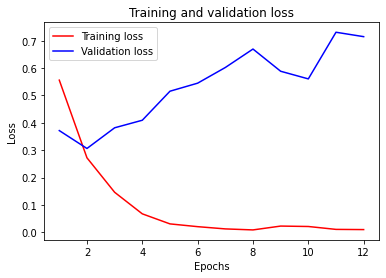

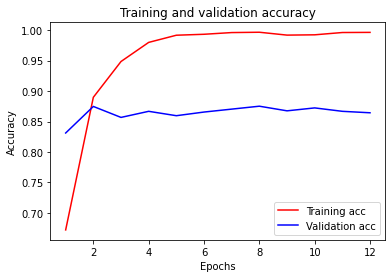

              precision    recall  f1-score   support

           0      0.866     0.890     0.878     12500
           1      0.887     0.863     0.875     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6389 - accuracy: 0.5789 - val_loss: 0.3725 - val_accuracy: 0.8312
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2790 - accuracy: 0.8876 - val_loss: 0.3074 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1326 - accuracy: 0.9572 - val_loss: 0.3179 - val_accuracy: 0.8740
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0576 - accuracy: 0.9857 - val_loss: 0.4073 - val_accuracy: 0.8764
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

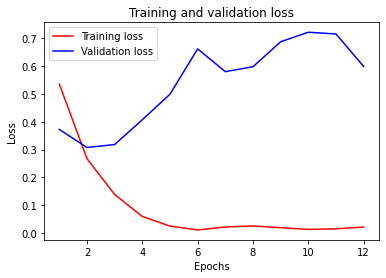

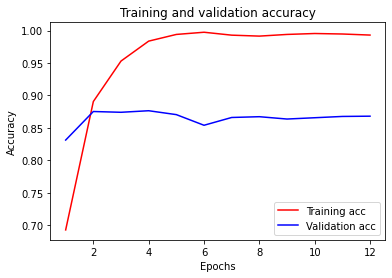

              precision    recall  f1-score   support

           0      0.848     0.913     0.879     12500
           1      0.906     0.836     0.869     12500

    accuracy                          0.874     25000
   macro avg      0.877     0.874     0.874     25000
weighted avg      0.877     0.874     0.874     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6517 - accuracy: 0.5712 - val_loss: 0.3590 - val_accuracy: 0.8428
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2805 - accuracy: 0.8876 - val_loss: 0.2936 - val_accuracy: 0.8700
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1314 - accuracy: 0.9560 - val_loss: 0.3095 - val_accuracy: 0.8776
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0603 - accuracy: 0.9855 - val_loss: 0.4717 - val_accuracy: 0.8616
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

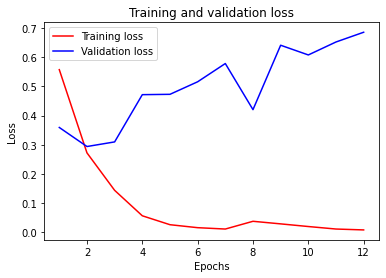

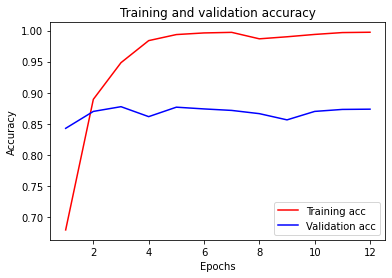

              precision    recall  f1-score   support

           0      0.907     0.831     0.867     12500
           1      0.844     0.914     0.878     12500

    accuracy                          0.873     25000
   macro avg      0.875     0.873     0.873     25000
weighted avg      0.875     0.873     0.873     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6501 - accuracy: 0.5654 - val_loss: 0.4052 - val_accuracy: 0.8160
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2787 - accuracy: 0.8876 - val_loss: 0.3154 - val_accuracy: 0.8724
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1189 - accuracy: 0.9624 - val_loss: 0.3366 - val_accuracy: 0.8796
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0459 - accuracy: 0.9882 - val_loss: 0.4466 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

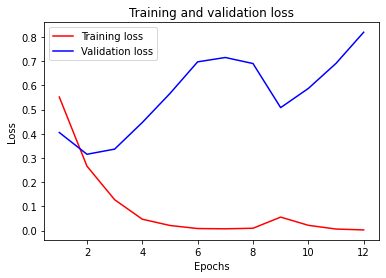

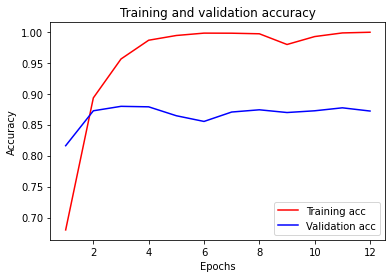

              precision    recall  f1-score   support

           0      0.915     0.819     0.864     12500
           1      0.836     0.924     0.878     12500

    accuracy                          0.872     25000
   macro avg      0.876     0.872     0.871     25000
weighted avg      0.876     0.872     0.871     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6421 - accuracy: 0.5871 - val_loss: 0.3334 - val_accuracy: 0.8628
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2617 - accuracy: 0.8958 - val_loss: 0.2947 - val_accuracy: 0.8764
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1161 - accuracy: 0.9626 - val_loss: 0.3470 - val_accuracy: 0.8712
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0542 - accuracy: 0.9851 - val_loss: 0.4651 - val_accuracy: 0.8684
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

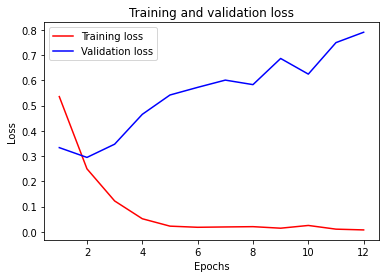

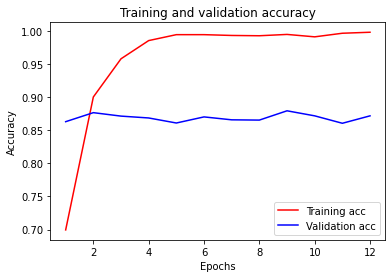

              precision    recall  f1-score   support

           0      0.882     0.866     0.874     12500
           1      0.869     0.885     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6560 - accuracy: 0.5593 - val_loss: 0.3458 - val_accuracy: 0.8452
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2707 - accuracy: 0.8945 - val_loss: 0.2958 - val_accuracy: 0.8744
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1289 - accuracy: 0.9582 - val_loss: 0.3398 - val_accuracy: 0.8688
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0561 - accuracy: 0.9849 - val_loss: 0.4322 - val_accuracy: 0.8668
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

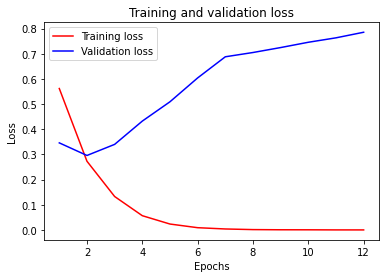

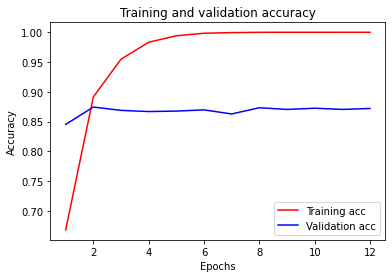

              precision    recall  f1-score   support

           0      0.883     0.861     0.872     12500
           1      0.864     0.886     0.875     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6405 - accuracy: 0.5807 - val_loss: 0.3310 - val_accuracy: 0.8600
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2568 - accuracy: 0.8968 - val_loss: 0.2953 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1325 - accuracy: 0.9555 - val_loss: 0.3284 - val_accuracy: 0.8760
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0554 - accuracy: 0.9843 - val_loss: 0.3920 - val_accuracy: 0.8816
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.

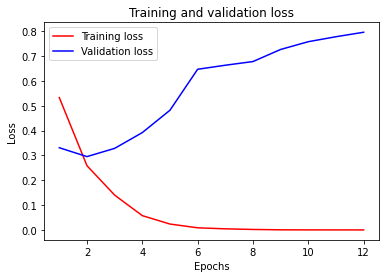

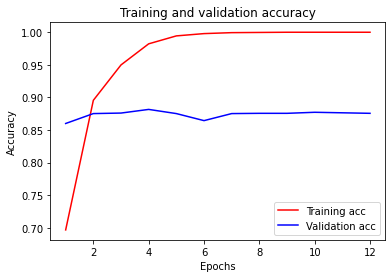

              precision    recall  f1-score   support

           0      0.889     0.860     0.874     12500
           1      0.864     0.892     0.878     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


Average accuracy: 0.8739 (+/- 0.0030)
Average loss: 0.3022 (+/- 0.0068)
Average F1: 0.8754 (+/- 0.0051)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
